<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Visualization I</h1>

## <font color='red' style='font-size: 30px;'>1.2 Knowing the Dataset</font>
<hr style='border: 2px solid red;'>

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Its the second part in the data visualization course. Here i am learning about more advanced principles of Matplotlib.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>The main goal is create any charts for in the future implement in my projects.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>This dataset is about irises collected by a florist</p>

## Import

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('../data/iris.csv')

In [13]:
data.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## changing variables for english

In [14]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [15]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatter Plot

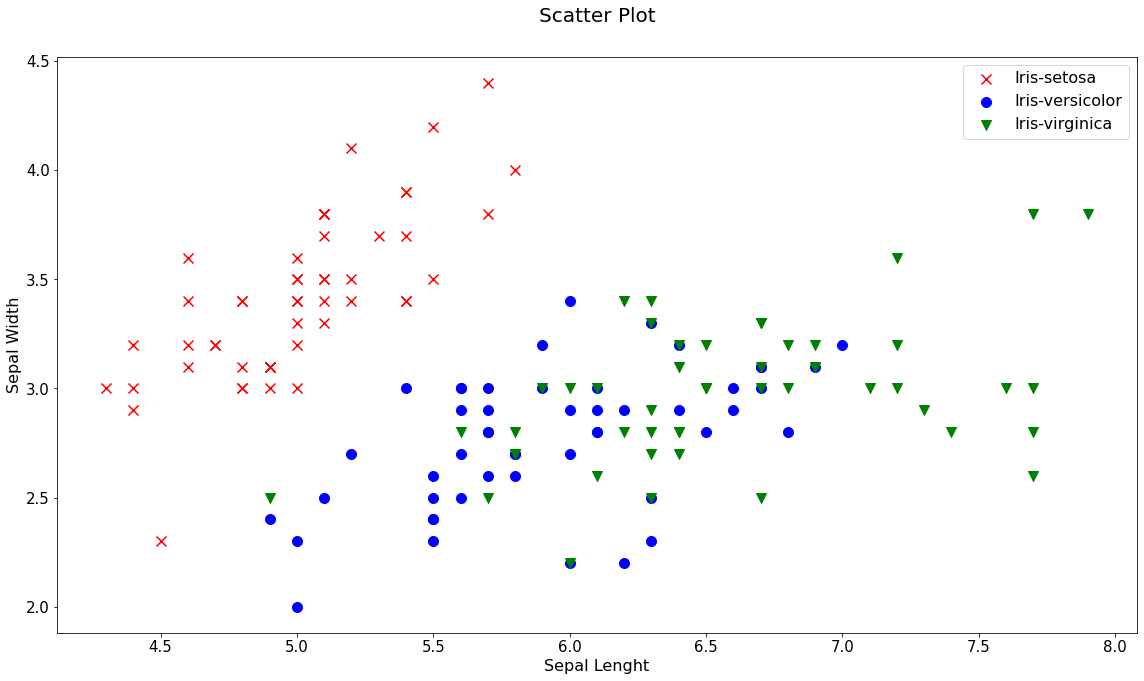

In [16]:
fig = plt.figure(figsize = (15, 8))

ax = fig.add_axes([0, 0, 1, 1])

# Creating many scatter for each specie

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
markers = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}
for specie in data['species'].unique():
    tmp = data[data['species'] == specie]
    ax.scatter(
        tmp['sepal_length'], 
        tmp['sepal_width'],
        color = colors[specie], 
        marker = markers[specie],
        s = 100
    )

# Setting grafic
ax.set_title('Scatter Plot', fontsize = 20, y = 1.05)
ax.set_xlabel('Sepal Lenght', fontsize = 16)
ax.set_ylabel('Sepal Width', fontsize = 16)
# Setting tick size 
ax.tick_params(labelsize = 15)

ax.legend(colors, fontsize = 16)

## BoxPlot

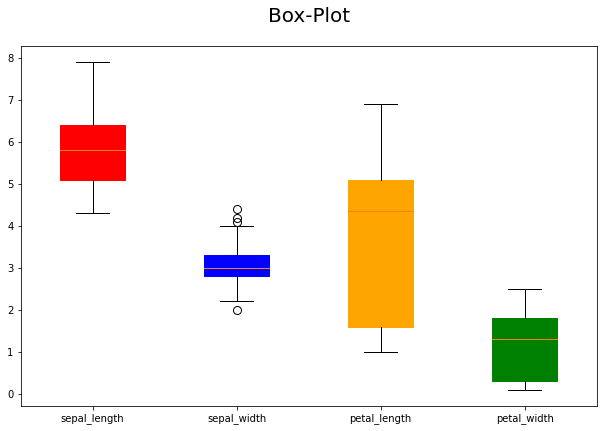

In [17]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

boxes = ax.boxplot(
    data.drop('species', axis = 1).values,
    patch_artist = True
)
ax.set_title('Box-Plot', fontsize = 20, y = 1.05)
ax.set_xticklabels(data.drop('species', axis = 1).columns)

# changing color in eack box
colors = ['red', 'blue', 'orange', 'green']
for box, color in zip(boxes['boxes'], colors):
    box.set_color(color)

# creating markers for outliers
for outlier in boxes['fliers']:
    outlier.set(marker = 'o', markersize = 8)

# Histogram

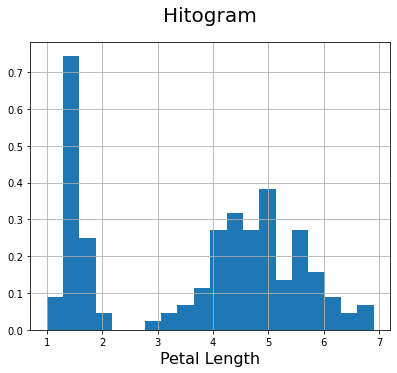

In [18]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# orientation = 'horizontal' -> for change if its necessary
ax.hist(data['petal_length'], bins = 20, density = True)
ax.set_title('Hitogram', fontsize = 20, y = 1.05)
ax.set_xlabel('Petal Length', fontsize = 16)
ax.grid(True)

## <font color='red' style='font-size: 30px;'>1.3 Customizing histograms</font>
<hr style='border: 2px solid red;'>

Text(4.35, 31, 'median')

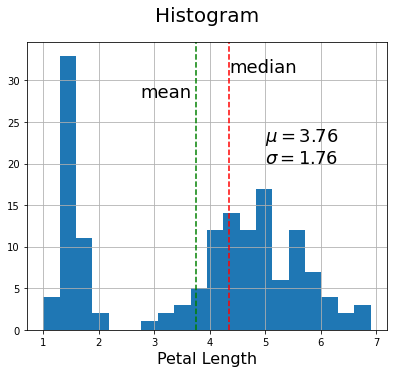

In [161]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

mu, sigma = data['petal_length'].mean(), data['petal_length'].std()

ax.hist(data['petal_length'], bins = 20)
ax.set_title('Histogram', fontsize = 20, y = 1.05)
ax.set_xlabel('Petal Length', fontsize = 16)
ax.grid(True)


# Creating annotation for mean and std
    # xy define the text place 
ax.annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (5, 20), 
    fontsize = 18
)

# Creating vertical lines for mean and median
ax.axvline(mu, color = 'green',  linestyle = '--')
ax.annotate('mean', xy = (mu - 1,  28), fontsize = 18)

ax.axvline(data['petal_length'].median(), color = 'red',  linestyle = '--')
ax.annotate('median', xy = (data['petal_length'].median(),  31), fontsize = 18)

[linestyles](https://matplotlib.org/3.1.3/api/markers_api.html)

## Combining figures

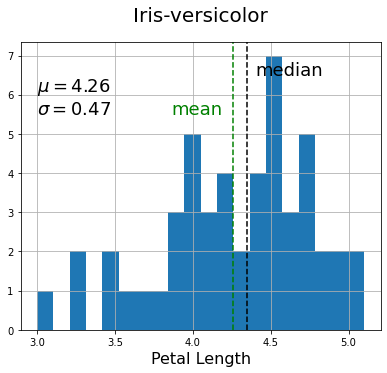

In [162]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Iris Types: is -> Iris-setosa, iv -> Iris-versicolor, ivg -> Iris-virginica
iv_data = data[data['species'] == 'Iris-versicolor']

mu, sigma = iv_data['petal_length'].mean(), iv_data['petal_length'].std()

ax.hist(iv_data['petal_length'], bins = 20)
ax.set_title('Iris-versicolor', fontsize = 20, y = 1.05)
ax.set_xlabel('Petal Length', fontsize = 16)
ax.grid(True)

ax.annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (3.0, 5.5), 
    fontsize = 18
)

ax.axvline(mu, color = 'green',  linestyle = '--')
ax.annotate('mean', xy = (mu - 0.4,  5.5), fontsize = 18, color = 'g')

ax.axvline(iv_data['petal_length'].median(), color = 'k',  linestyle = '--')
ax.annotate('median', xy = (iv_data['petal_length'].median() + 0.05,  6.5), fontsize = 18)

fig.savefig('image-results/iv_histogram.png', bbox_inches = 'tight')

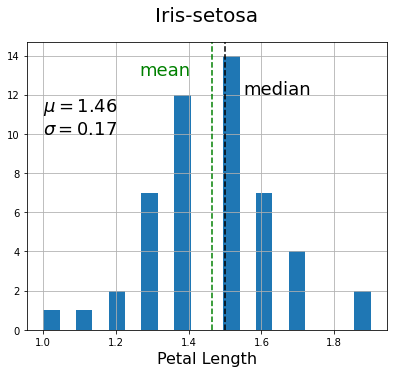

In [163]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Iris Types: is -> Iris-setosa, iv -> Iris-versicolor, ivg -> Iris-virginica
is_data = data[data['species'] == 'Iris-setosa']

mu, sigma = is_data['petal_length'].mean(), is_data['petal_length'].std()

ax.hist(is_data['petal_length'], bins = 20)
ax.set_title('Iris-setosa', fontsize = 20, y = 1.05)
ax.set_xlabel('Petal Length', fontsize = 16)
ax.grid(True)

ax.annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (1.0, 10), 
    fontsize = 18
)

ax.axvline(mu, color = 'green',  linestyle = '--')
ax.annotate('mean', xy = (mu - 0.2,  13), fontsize = 18, color = 'g')

ax.axvline(is_data['petal_length'].median(), color = 'k', linestyle = '--')
ax.annotate('median', xy = (is_data['petal_length'].median() + 0.05,  12.0), fontsize = 18)

fig.savefig('image-results/is_histogram.png', bbox_inches = 'tight')

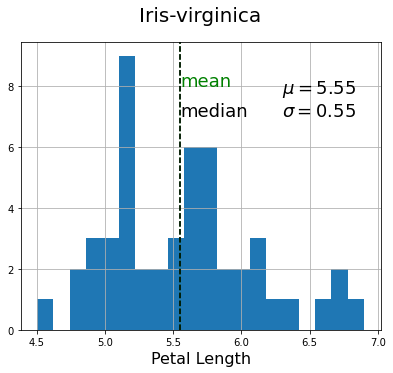

In [164]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Iris Types: is -> Iris-setosa, iv -> Iris-versicolor, ivg -> Iris-virginica
ivg_data = data[data['species'] == 'Iris-virginica']

mu, sigma = ivg_data['petal_length'].mean(), ivg_data['petal_length'].std()

ax.hist(ivg_data['petal_length'], bins = 20)
ax.set_title('Iris-virginica', fontsize = 20, y = 1.05)
ax.set_xlabel('Petal Length', fontsize = 16)
ax.grid(True)

ax.annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (6.3, 7), 
    fontsize = 18
)

ax.axvline(mu, color = 'green',  linestyle = '--')
ax.annotate('mean', xy = (mu,  8), fontsize = 18, color = 'g')

ax.axvline(ivg_data['petal_length'].median(), color = 'k', linestyle = '--')
ax.annotate('median', xy = (ivg_data['petal_length'].median(),  7), fontsize = 18)

fig.savefig('image-results/ivg_histogram.png', bbox_inches = 'tight')

In [166]:
from PIL import Image

width, height = Image.open('image-results/ivg_histogram.png').size


combined = Image.new('RGB', (3 * width, height))
interval = 0

for image in map(Image.open, ['image-results/iv_histogram.png', 'image-results/is_histogram.png', 'image-results/ivg_histogram.png']):
    combined.paste(image, (interval, 0))
    interval += width
    

combined.save('image-results/combined.png')

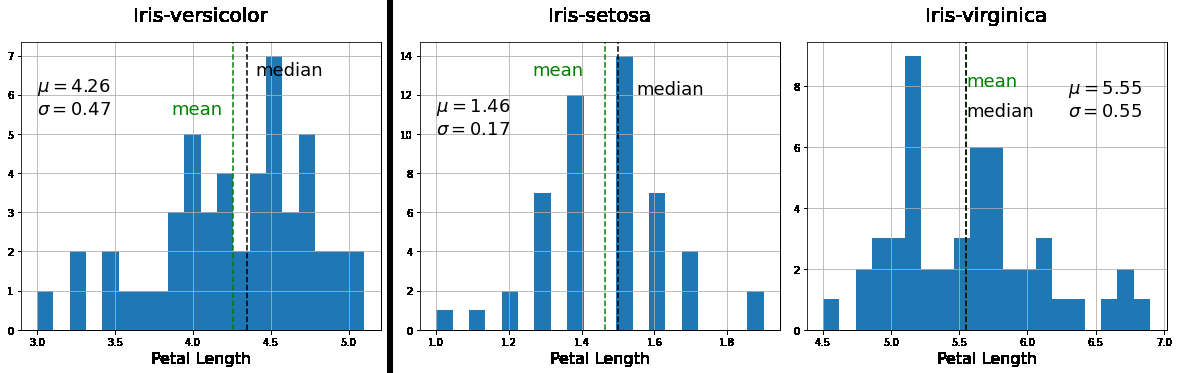

In [167]:
combined

## Doing it with matplotlib

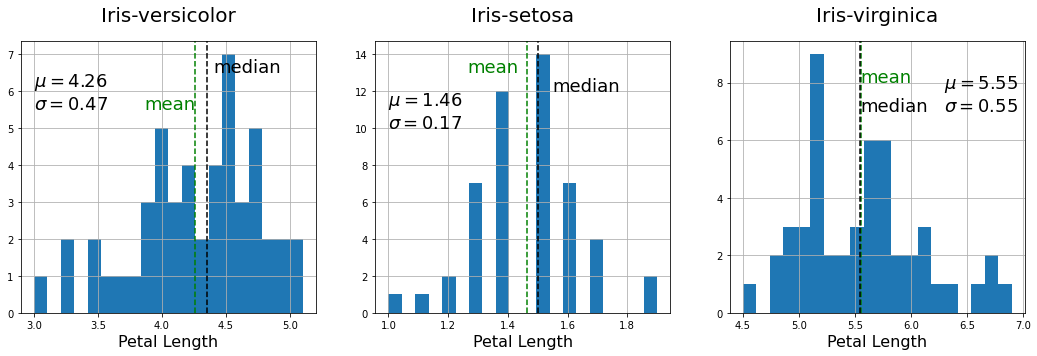

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Iris Versicolor
iv_data = data[data['species'] == 'Iris-versicolor']
mu, sigma = iv_data['petal_length'].mean(), iv_data['petal_length'].std()

ax[0].hist(iv_data['petal_length'], bins = 20)
ax[0].set_title('Iris-versicolor', fontsize = 20, y = 1.05)
ax[0].set_xlabel('Petal Length', fontsize = 16)
ax[0].grid(True)
ax[0].annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (3.0, 5.5), 
    fontsize = 18
)
ax[0].axvline(mu, color = 'green',  linestyle = '--')
ax[0].annotate('mean', xy = (mu - 0.4,  5.5), fontsize = 18, color = 'g')
ax[0].axvline(iv_data['petal_length'].median(), color = 'k',  linestyle = '--')
ax[0].annotate('median', xy = (iv_data['petal_length'].median() + 0.05,  6.5), fontsize = 18)


# Íris Setosa

is_data = data[data['species'] == 'Iris-setosa']
mu, sigma = is_data['petal_length'].mean(), is_data['petal_length'].std()

ax[1].hist(is_data['petal_length'], bins = 20)
ax[1].set_title('Iris-setosa', fontsize = 20, y = 1.05)
ax[1].set_xlabel('Petal Length', fontsize = 16)
ax[1].grid(True)
ax[1].annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (1.0, 10), 
    fontsize = 18
)
ax[1].axvline(mu, color = 'green',  linestyle = '--')
ax[1].annotate('mean', xy = (mu - 0.2,  13), fontsize = 18, color = 'g')
ax[1].axvline(is_data['petal_length'].median(), color = 'k', linestyle = '--')
ax[1].annotate('median', xy = (is_data['petal_length'].median() + 0.05,  12.0), fontsize = 18)


# Íris Virgínica

ivg_data = data[data['species'] == 'Iris-virginica']
mu, sigma = ivg_data['petal_length'].mean(), ivg_data['petal_length'].std()

ax[2].hist(ivg_data['petal_length'], bins = 20)
ax[2].set_title('Iris-virginica', fontsize = 20, y = 1.05)
ax[2].set_xlabel('Petal Length', fontsize = 16)
ax[2].grid(True)

ax[2].annotate(
    f'$\mu = {mu:.2f}$\n$\sigma = {sigma:.2f}$', 
    xy = (6.3, 7), 
    fontsize = 18
)

ax[2].axvline(mu, color = 'green',  linestyle = '--')
ax[2].annotate('mean', xy = (mu,  8), fontsize = 18, color = 'g')

ax[2].axvline(ivg_data['petal_length'].median(), color = 'k', linestyle = '--')
ax[2].annotate('median', xy = (ivg_data['petal_length'].median(),  7), fontsize = 18)


# Saving
fig.savefig('image-results/histograms.png', bbox_inches='tight')

plt.show()